In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pickle

In [2]:
print(tf. __version__)

2.6.2


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Import Dataset

In [4]:
df_pen = sns.load_dataset('penguins')

In [5]:
df_pen = df_pen.dropna()

In [6]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [7]:
X = df_pen.drop(['sex'], axis = 1)
y = df_pen['sex']

## Data Pre-processing

In [8]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [9]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [10]:
X = pd.get_dummies(X, drop_first = True)
y = pd.get_dummies(y, drop_first = True)

In [11]:
X.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,50.7,19.7,203.0,4050.0,1,0,1,0
1,36.7,19.3,193.0,3450.0,0,0,0,1
2,50.3,20.0,197.0,3300.0,1,0,1,0


In [12]:
y.head(3)

,Male
0,1
1,0
2,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [14]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [15]:
X_train.shape

(233, 8)

In [16]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
8/8 [==============================] - 3s 59ms/step - loss: 0.7009 - accuracy: 0.5837 - val_loss: 0.6879 - val_accuracy: 0.7100
Epoch 2/600
8/8 [==============================] - 0s 16ms/step - loss: 0.6957 - accuracy: 0.5751 - val_loss: 0.6820 - val_accuracy: 0.6600
Epoch 3/600
8/8 [==============================] - 0s 17ms/step - loss: 0.6904 - accuracy: 0.5966 - val_loss: 0.6769 - val_accuracy: 0.6600
Epoch 4/600
8/8 [==============================] - 0s 20ms/step - loss: 0.6855 - accuracy: 0.6052 - val_loss: 0.6719 - val_accuracy: 0.6900
Epoch 5/600
8/8 [==============================] - 0s 21ms/step - loss: 0.6800 - accuracy: 0.6052 - val_loss: 0.6668 - val_accuracy: 0.6900
Epoch 6/600
8/8 [==============================] - 0s 22ms/step - loss: 0.6747 - accuracy: 0.6137 - val_loss: 0.6611 - val_accuracy: 0.6900
Epoch 7/600
8/8 [==============================] - 0s 19ms/step - loss: 0.6690 - accuracy: 0.6309 - val_loss: 0.6558 - val_accuracy: 0.7000
Epoch 8/600
8/8 [===

8/8 [==============================] - 0s 22ms/step - loss: 0.3012 - accuracy: 0.8970 - val_loss: 0.2531 - val_accuracy: 0.9100
Epoch 60/600
8/8 [==============================] - 0s 16ms/step - loss: 0.2970 - accuracy: 0.8970 - val_loss: 0.2490 - val_accuracy: 0.8900
Epoch 61/600
8/8 [==============================] - 0s 14ms/step - loss: 0.2926 - accuracy: 0.9013 - val_loss: 0.2457 - val_accuracy: 0.8900
Epoch 62/600
8/8 [==============================] - 0s 15ms/step - loss: 0.2878 - accuracy: 0.9013 - val_loss: 0.2433 - val_accuracy: 0.9000
Epoch 63/600
8/8 [==============================] - 0s 15ms/step - loss: 0.2837 - accuracy: 0.9056 - val_loss: 0.2411 - val_accuracy: 0.9100
Epoch 64/600
8/8 [==============================] - 0s 19ms/step - loss: 0.2797 - accuracy: 0.9056 - val_loss: 0.2400 - val_accuracy: 0.9100
Epoch 65/600
8/8 [==============================] - 0s 19ms/step - loss: 0.2761 - accuracy: 0.9056 - val_loss: 0.2374 - val_accuracy: 0.9100
Epoch 66/600
8/8 [========

8/8 [==============================] - 0s 15ms/step - loss: 0.1966 - accuracy: 0.9227 - val_loss: 0.1827 - val_accuracy: 0.9200
Epoch 118/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1962 - accuracy: 0.9185 - val_loss: 0.1824 - val_accuracy: 0.9200
Epoch 119/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1962 - accuracy: 0.9185 - val_loss: 0.1841 - val_accuracy: 0.9200
Epoch 120/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1954 - accuracy: 0.9227 - val_loss: 0.1828 - val_accuracy: 0.9200
Epoch 121/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1954 - accuracy: 0.9270 - val_loss: 0.1845 - val_accuracy: 0.9200
Epoch 122/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1937 - accuracy: 0.9185 - val_loss: 0.1842 - val_accuracy: 0.9200
Epoch 123/600
8/8 [==============================] - 0s 17ms/step - loss: 0.1932 - accuracy: 0.9227 - val_loss: 0.1843 - val_accuracy: 0.9200
Epoch 124/600
8/8 [=

Epoch 175/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1756 - accuracy: 0.9270 - val_loss: 0.1776 - val_accuracy: 0.9200
Epoch 176/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1749 - accuracy: 0.9270 - val_loss: 0.1800 - val_accuracy: 0.9200
Epoch 177/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1742 - accuracy: 0.9270 - val_loss: 0.1824 - val_accuracy: 0.9200
Epoch 178/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1740 - accuracy: 0.9270 - val_loss: 0.1829 - val_accuracy: 0.9200
Epoch 179/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1738 - accuracy: 0.9313 - val_loss: 0.1827 - val_accuracy: 0.9200
Epoch 180/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1734 - accuracy: 0.9313 - val_loss: 0.1829 - val_accuracy: 0.9200
Epoch 181/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1737 - accuracy: 0.9313 - val_loss: 0.1793 - val_accuracy: 0.9200
Epoch 

Epoch 233/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1648 - accuracy: 0.9313 - val_loss: 0.1795 - val_accuracy: 0.9100
Epoch 234/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1636 - accuracy: 0.9313 - val_loss: 0.1844 - val_accuracy: 0.9200
Epoch 235/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1639 - accuracy: 0.9356 - val_loss: 0.1877 - val_accuracy: 0.9200
Epoch 236/600
8/8 [==============================] - 0s 20ms/step - loss: 0.1638 - accuracy: 0.9356 - val_loss: 0.1891 - val_accuracy: 0.9200
Epoch 237/600
8/8 [==============================] - 0s 23ms/step - loss: 0.1640 - accuracy: 0.9356 - val_loss: 0.1910 - val_accuracy: 0.9200
Epoch 238/600
8/8 [==============================] - 0s 24ms/step - loss: 0.1638 - accuracy: 0.9356 - val_loss: 0.1909 - val_accuracy: 0.9200
Epoch 239/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1637 - accuracy: 0.9356 - val_loss: 0.1918 - val_accuracy: 0.9200
Epoch 

Epoch 291/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1571 - accuracy: 0.9356 - val_loss: 0.1873 - val_accuracy: 0.9200
Epoch 292/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1575 - accuracy: 0.9313 - val_loss: 0.1854 - val_accuracy: 0.9200
Epoch 293/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1574 - accuracy: 0.9356 - val_loss: 0.1860 - val_accuracy: 0.9200
Epoch 294/600
8/8 [==============================] - 0s 20ms/step - loss: 0.1573 - accuracy: 0.9356 - val_loss: 0.1864 - val_accuracy: 0.9200
Epoch 295/600
8/8 [==============================] - 0s 17ms/step - loss: 0.1573 - accuracy: 0.9313 - val_loss: 0.1855 - val_accuracy: 0.9200
Epoch 296/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1570 - accuracy: 0.9399 - val_loss: 0.1876 - val_accuracy: 0.9200
Epoch 297/600
8/8 [==============================] - 0s 19ms/step - loss: 0.1565 - accuracy: 0.9399 - val_loss: 0.1876 - val_accuracy: 0.9200
Epoch 

Epoch 349/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1523 - accuracy: 0.9399 - val_loss: 0.1933 - val_accuracy: 0.9100
Epoch 350/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1525 - accuracy: 0.9356 - val_loss: 0.1970 - val_accuracy: 0.9100
Epoch 351/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1529 - accuracy: 0.9356 - val_loss: 0.1974 - val_accuracy: 0.9100
Epoch 352/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1525 - accuracy: 0.9356 - val_loss: 0.1967 - val_accuracy: 0.9100
Epoch 353/600
8/8 [==============================] - 0s 21ms/step - loss: 0.1527 - accuracy: 0.9356 - val_loss: 0.1886 - val_accuracy: 0.9100
Epoch 354/600
8/8 [==============================] - 0s 28ms/step - loss: 0.1521 - accuracy: 0.9356 - val_loss: 0.1876 - val_accuracy: 0.9100
Epoch 355/600
8/8 [==============================] - 0s 22ms/step - loss: 0.1522 - accuracy: 0.9356 - val_loss: 0.1857 - val_accuracy: 0.9000
Epoch 

Epoch 407/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1488 - accuracy: 0.9399 - val_loss: 0.2005 - val_accuracy: 0.9100
Epoch 408/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1490 - accuracy: 0.9399 - val_loss: 0.2002 - val_accuracy: 0.9100
Epoch 409/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1490 - accuracy: 0.9399 - val_loss: 0.1962 - val_accuracy: 0.9100
Epoch 410/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1482 - accuracy: 0.9399 - val_loss: 0.1975 - val_accuracy: 0.9100
Epoch 411/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1483 - accuracy: 0.9399 - val_loss: 0.1978 - val_accuracy: 0.9100
Epoch 412/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1488 - accuracy: 0.9399 - val_loss: 0.2000 - val_accuracy: 0.9100
Epoch 413/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1494 - accuracy: 0.9399 - val_loss: 0.1970 - val_accuracy: 0.9100
Epoch 

Epoch 465/600
8/8 [==============================] - 0s 24ms/step - loss: 0.1459 - accuracy: 0.9399 - val_loss: 0.1938 - val_accuracy: 0.9100
Epoch 466/600
8/8 [==============================] - 0s 21ms/step - loss: 0.1465 - accuracy: 0.9356 - val_loss: 0.1936 - val_accuracy: 0.9100
Epoch 467/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1463 - accuracy: 0.9356 - val_loss: 0.1942 - val_accuracy: 0.9100
Epoch 468/600
8/8 [==============================] - 0s 23ms/step - loss: 0.1467 - accuracy: 0.9356 - val_loss: 0.1924 - val_accuracy: 0.9000
Epoch 469/600
8/8 [==============================] - 0s 22ms/step - loss: 0.1468 - accuracy: 0.9356 - val_loss: 0.1959 - val_accuracy: 0.9100
Epoch 470/600
8/8 [==============================] - 0s 22ms/step - loss: 0.1463 - accuracy: 0.9356 - val_loss: 0.1955 - val_accuracy: 0.9100
Epoch 471/600
8/8 [==============================] - 0s 23ms/step - loss: 0.1459 - accuracy: 0.9356 - val_loss: 0.1968 - val_accuracy: 0.9100
Epoch 

Epoch 523/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1451 - accuracy: 0.9399 - val_loss: 0.1990 - val_accuracy: 0.9100
Epoch 524/600
8/8 [==============================] - 0s 22ms/step - loss: 0.1443 - accuracy: 0.9399 - val_loss: 0.1979 - val_accuracy: 0.9100
Epoch 525/600
8/8 [==============================] - 0s 27ms/step - loss: 0.1440 - accuracy: 0.9399 - val_loss: 0.2018 - val_accuracy: 0.9100
Epoch 526/600
8/8 [==============================] - 0s 21ms/step - loss: 0.1437 - accuracy: 0.9399 - val_loss: 0.2020 - val_accuracy: 0.9100
Epoch 527/600
8/8 [==============================] - 0s 24ms/step - loss: 0.1442 - accuracy: 0.9399 - val_loss: 0.2022 - val_accuracy: 0.9200
Epoch 528/600
8/8 [==============================] - 0s 23ms/step - loss: 0.1437 - accuracy: 0.9442 - val_loss: 0.1988 - val_accuracy: 0.9200
Epoch 529/600
8/8 [==============================] - 0s 24ms/step - loss: 0.1436 - accuracy: 0.9442 - val_loss: 0.1971 - val_accuracy: 0.9200
Epoch 

8/8 [==============================] - 0s 16ms/step - loss: 0.1429 - accuracy: 0.9399 - val_loss: 0.1985 - val_accuracy: 0.9100
Epoch 581/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1420 - accuracy: 0.9399 - val_loss: 0.2013 - val_accuracy: 0.9100
Epoch 582/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1418 - accuracy: 0.9399 - val_loss: 0.2005 - val_accuracy: 0.9200
Epoch 583/600
8/8 [==============================] - 0s 17ms/step - loss: 0.1415 - accuracy: 0.9356 - val_loss: 0.1984 - val_accuracy: 0.9200
Epoch 584/600
8/8 [==============================] - 0s 18ms/step - loss: 0.1417 - accuracy: 0.9442 - val_loss: 0.1993 - val_accuracy: 0.9200
Epoch 585/600
8/8 [==============================] - 0s 21ms/step - loss: 0.1421 - accuracy: 0.9442 - val_loss: 0.1957 - val_accuracy: 0.9200
Epoch 586/600
8/8 [==============================] - 0s 16ms/step - loss: 0.1416 - accuracy: 0.9442 - val_loss: 0.1960 - val_accuracy: 0.9200
Epoch 587/600
8/8 [=

## Evaluation

In [18]:
model.history.history

{'loss': [0.700949490070343,
  0.6956924200057983,
  0.6904129981994629,
  0.6855130791664124,
  0.6800171732902527,
  0.674673855304718,
  0.6689721345901489,
  0.6633535027503967,
  0.6569706201553345,
  0.6499426960945129,
  0.642339289188385,
  0.6358382105827332,
  0.6282416582107544,
  0.6214713454246521,
  0.6145163774490356,
  0.6077683568000793,
  0.6003584861755371,
  0.5934401750564575,
  0.5856371521949768,
  0.5777488946914673,
  0.569938063621521,
  0.5620501041412354,
  0.5546486377716064,
  0.5468677878379822,
  0.5392065644264221,
  0.5320764780044556,
  0.524499237537384,
  0.5166060924530029,
  0.5090903639793396,
  0.5013958215713501,
  0.49392232298851013,
  0.48616763949394226,
  0.47840940952301025,
  0.4706929326057434,
  0.46289655566215515,
  0.45526421070098877,
  0.4472894072532654,
  0.43952473998069763,
  0.43209537863731384,
  0.4250015318393707,
  0.4172748923301697,
  0.4096553921699524,
  0.4020126461982727,
  0.3955502212047577,
  0.38778823614120483,

<AxesSubplot:>

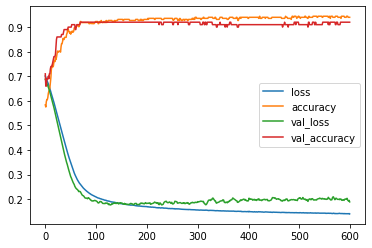

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [23]:
training_score

[0.14053389430046082, 0.9356223344802856]

In [24]:
test_score

[0.18934869766235352, 0.9200000166893005]

In [25]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [26]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [27]:
pred_df.head()

,Test_Y,Model_Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [28]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

0.92

In [29]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

array([[44,  5],
       [ 3, 48]], dtype=int64)

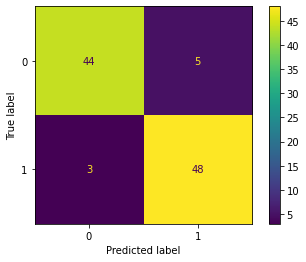

In [30]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [31]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        49
           1       0.91      0.94      0.92        51

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



## Early Stopping

In [32]:
model = Sequential()
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
8/8 [==============================] - 1s 40ms/step - loss: 0.6817 - accuracy: 0.5536 - val_loss: 0.6601 - val_accuracy: 0.5700
Epoch 2/600
8/8 [==============================] - 0s 15ms/step - loss: 0.6577 - accuracy: 0.5794 - val_loss: 0.6368 - val_accuracy: 0.5900
Epoch 3/600
8/8 [==============================] - 0s 15ms/step - loss: 0.6368 - accuracy: 0.6094 - val_loss: 0.6156 - val_accuracy: 0.6000
Epoch 4/600
8/8 [==============================] - 0s 13ms/step - loss: 0.6190 - accuracy: 0.6438 - val_loss: 0.5969 - val_accuracy: 0.6400
Epoch 5/600
8/8 [==============================] - 0s 14ms/step - loss: 0.6024 - accuracy: 0.6481 - val_loss: 0.5797 - val_accuracy: 0.6500
Epoch 6/600
8/8 [==============================] - 0s 14ms/step - loss: 0.5880 - accuracy: 0.6695 - val_loss: 0.5644 - val_accuracy: 0.6700
Epoch 7/600
8/8 [==============================] - 0s 15ms/step - loss: 0.5751 - accuracy: 0.6824 - val_loss: 0.5505 - val_accuracy: 0.6900
Epoch 8/600
8/8 [===

8/8 [==============================] - 0s 21ms/step - loss: 0.2438 - accuracy: 0.9099 - val_loss: 0.2045 - val_accuracy: 0.8900
Epoch 60/600
8/8 [==============================] - 0s 24ms/step - loss: 0.2418 - accuracy: 0.9056 - val_loss: 0.2053 - val_accuracy: 0.9000
Epoch 61/600
8/8 [==============================] - 0s 17ms/step - loss: 0.2402 - accuracy: 0.9056 - val_loss: 0.2005 - val_accuracy: 0.8900
Epoch 62/600
8/8 [==============================] - 0s 20ms/step - loss: 0.2376 - accuracy: 0.9056 - val_loss: 0.1980 - val_accuracy: 0.8900
Epoch 63/600
8/8 [==============================] - 0s 19ms/step - loss: 0.2357 - accuracy: 0.9056 - val_loss: 0.1980 - val_accuracy: 0.9000
Epoch 64/600
8/8 [==============================] - 0s 25ms/step - loss: 0.2339 - accuracy: 0.9056 - val_loss: 0.1988 - val_accuracy: 0.8900
Epoch 65/600
8/8 [==============================] - 0s 20ms/step - loss: 0.2324 - accuracy: 0.9099 - val_loss: 0.1980 - val_accuracy: 0.8900
Epoch 66/600
8/8 [========

8/8 [==============================] - 0s 19ms/step - loss: 0.1845 - accuracy: 0.9270 - val_loss: 0.1732 - val_accuracy: 0.9200
Epoch 118/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1844 - accuracy: 0.9227 - val_loss: 0.1713 - val_accuracy: 0.9200
Epoch 119/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1839 - accuracy: 0.9227 - val_loss: 0.1698 - val_accuracy: 0.9200
Epoch 120/600
8/8 [==============================] - 0s 13ms/step - loss: 0.1833 - accuracy: 0.9227 - val_loss: 0.1701 - val_accuracy: 0.9200
Epoch 121/600
8/8 [==============================] - 0s 15ms/step - loss: 0.1832 - accuracy: 0.9270 - val_loss: 0.1713 - val_accuracy: 0.9200
Epoch 122/600
8/8 [==============================] - 0s 17ms/step - loss: 0.1826 - accuracy: 0.9270 - val_loss: 0.1709 - val_accuracy: 0.9200
Epoch 123/600
8/8 [==============================] - 0s 14ms/step - loss: 0.1821 - accuracy: 0.9270 - val_loss: 0.1701 - val_accuracy: 0.9200
Epoch 124/600
8/8 [=

## Evaluation

In [35]:
model.history.history

{'loss': [0.6817453503608704,
  0.6576672196388245,
  0.6368045210838318,
  0.6190465688705444,
  0.6024063229560852,
  0.5879608988761902,
  0.5750700235366821,
  0.5638779997825623,
  0.5521981716156006,
  0.5416427254676819,
  0.5316580533981323,
  0.5217903256416321,
  0.5127690434455872,
  0.5041190385818481,
  0.49507367610931396,
  0.48668399453163147,
  0.4789024293422699,
  0.4714891016483307,
  0.4636012017726898,
  0.4563516676425934,
  0.4487660229206085,
  0.44139760732650757,
  0.43482279777526855,
  0.42803090810775757,
  0.42112207412719727,
  0.4138328433036804,
  0.4066532552242279,
  0.39909568428993225,
  0.391482949256897,
  0.3845108449459076,
  0.3772408366203308,
  0.36993440985679626,
  0.36335375905036926,
  0.3557857871055603,
  0.3482675850391388,
  0.3403918445110321,
  0.33274713158607483,
  0.3254460394382477,
  0.31891298294067383,
  0.31223154067993164,
  0.30672159790992737,
  0.3012748658657074,
  0.2960895895957947,
  0.2910650968551636,
  0.28640809

<AxesSubplot:>

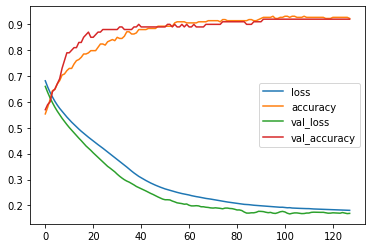

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [40]:
training_score

[0.17981673777103424, 0.9270386099815369]

In [41]:
test_score

[0.16907645761966705, 0.9200000166893005]

In [42]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [43]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [44]:
pred_df.head()

,Test_Y,Model_Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [45]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

0.92

In [46]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

array([[43,  6],
       [ 2, 49]], dtype=int64)

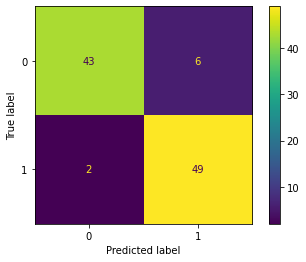

In [47]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [48]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91        49
           1       0.89      0.96      0.92        51

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



## Adding in DropOut Layers

In [49]:
model = Sequential()
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
8/8 [==============================] - 1s 38ms/step - loss: 0.7642 - accuracy: 0.5322 - val_loss: 0.7256 - val_accuracy: 0.4700
Epoch 2/600
8/8 [==============================] - 0s 15ms/step - loss: 0.7640 - accuracy: 0.4635 - val_loss: 0.7186 - val_accuracy: 0.4700
Epoch 3/600
8/8 [==============================] - 0s 17ms/step - loss: 0.7373 - accuracy: 0.5236 - val_loss: 0.7126 - val_accuracy: 0.4600
Epoch 4/600
8/8 [==============================] - 0s 15ms/step - loss: 0.7762 - accuracy: 0.5408 - val_loss: 0.7070 - val_accuracy: 0.4900
Epoch 5/600
8/8 [==============================] - 0s 17ms/step - loss: 0.7231 - accuracy: 0.5579 - val_loss: 0.7010 - val_accuracy: 0.5600
Epoch 6/600
8/8 [==============================] - 0s 17ms/step - loss: 0.7338 - accuracy: 0.5322 - val_loss: 0.6965 - val_accuracy: 0.5800
Epoch 7/600
8/8 [==============================] - 0s 16ms/step - loss: 0.7644 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.6300
Epoch 8/600
8/8 [===

8/8 [==============================] - 0s 26ms/step - loss: 0.5933 - accuracy: 0.6738 - val_loss: 0.6142 - val_accuracy: 0.8400
Epoch 60/600
8/8 [==============================] - 0s 22ms/step - loss: 0.6172 - accuracy: 0.6652 - val_loss: 0.6120 - val_accuracy: 0.8400
Epoch 61/600
8/8 [==============================] - 0s 27ms/step - loss: 0.6171 - accuracy: 0.6395 - val_loss: 0.6101 - val_accuracy: 0.8400
Epoch 62/600
8/8 [==============================] - 0s 19ms/step - loss: 0.6473 - accuracy: 0.5751 - val_loss: 0.6087 - val_accuracy: 0.8500
Epoch 63/600
8/8 [==============================] - 0s 23ms/step - loss: 0.6368 - accuracy: 0.5966 - val_loss: 0.6085 - val_accuracy: 0.8500
Epoch 64/600
8/8 [==============================] - 0s 22ms/step - loss: 0.6101 - accuracy: 0.6738 - val_loss: 0.6065 - val_accuracy: 0.8500
Epoch 65/600
8/8 [==============================] - 0s 22ms/step - loss: 0.6251 - accuracy: 0.6352 - val_loss: 0.6053 - val_accuracy: 0.8500
Epoch 66/600
8/8 [========

8/8 [==============================] - 0s 20ms/step - loss: 0.5522 - accuracy: 0.6910 - val_loss: 0.5202 - val_accuracy: 0.9100
Epoch 118/600
8/8 [==============================] - 0s 20ms/step - loss: 0.5507 - accuracy: 0.7039 - val_loss: 0.5162 - val_accuracy: 0.9100
Epoch 119/600
8/8 [==============================] - 0s 21ms/step - loss: 0.5521 - accuracy: 0.6953 - val_loss: 0.5115 - val_accuracy: 0.9200
Epoch 120/600
8/8 [==============================] - 0s 22ms/step - loss: 0.5634 - accuracy: 0.6996 - val_loss: 0.5087 - val_accuracy: 0.9200
Epoch 121/600
8/8 [==============================] - 0s 19ms/step - loss: 0.5526 - accuracy: 0.6996 - val_loss: 0.5067 - val_accuracy: 0.9100
Epoch 122/600
8/8 [==============================] - 0s 18ms/step - loss: 0.5570 - accuracy: 0.6738 - val_loss: 0.5042 - val_accuracy: 0.9100
Epoch 123/600
8/8 [==============================] - 0s 17ms/step - loss: 0.5832 - accuracy: 0.6481 - val_loss: 0.5011 - val_accuracy: 0.9100
Epoch 124/600
8/8 [=

Epoch 175/600
8/8 [==============================] - 0s 18ms/step - loss: 0.5050 - accuracy: 0.6953 - val_loss: 0.3385 - val_accuracy: 0.9300
Epoch 176/600
8/8 [==============================] - 0s 18ms/step - loss: 0.4913 - accuracy: 0.7511 - val_loss: 0.3371 - val_accuracy: 0.9300
Epoch 177/600
8/8 [==============================] - 0s 21ms/step - loss: 0.5064 - accuracy: 0.7468 - val_loss: 0.3361 - val_accuracy: 0.9300
Epoch 178/600
8/8 [==============================] - 0s 22ms/step - loss: 0.5179 - accuracy: 0.7124 - val_loss: 0.3347 - val_accuracy: 0.9300
Epoch 179/600
8/8 [==============================] - 0s 20ms/step - loss: 0.5138 - accuracy: 0.7597 - val_loss: 0.3344 - val_accuracy: 0.9300
Epoch 180/600
8/8 [==============================] - 0s 25ms/step - loss: 0.4764 - accuracy: 0.7468 - val_loss: 0.3335 - val_accuracy: 0.9300
Epoch 181/600
8/8 [==============================] - 0s 32ms/step - loss: 0.4700 - accuracy: 0.7382 - val_loss: 0.3323 - val_accuracy: 0.9300
Epoch 

Epoch 233/600
8/8 [==============================] - 0s 18ms/step - loss: 0.4251 - accuracy: 0.7897 - val_loss: 0.2668 - val_accuracy: 0.9200
Epoch 234/600
8/8 [==============================] - 0s 16ms/step - loss: 0.4846 - accuracy: 0.7253 - val_loss: 0.2656 - val_accuracy: 0.9200
Epoch 235/600
8/8 [==============================] - 0s 17ms/step - loss: 0.4392 - accuracy: 0.7725 - val_loss: 0.2652 - val_accuracy: 0.9200
Epoch 236/600
8/8 [==============================] - 0s 22ms/step - loss: 0.4368 - accuracy: 0.7682 - val_loss: 0.2645 - val_accuracy: 0.9200
Epoch 237/600
8/8 [==============================] - 0s 21ms/step - loss: 0.4283 - accuracy: 0.7554 - val_loss: 0.2634 - val_accuracy: 0.9200
Epoch 238/600
8/8 [==============================] - 0s 21ms/step - loss: 0.4247 - accuracy: 0.7768 - val_loss: 0.2620 - val_accuracy: 0.9200
Epoch 239/600
8/8 [==============================] - 0s 20ms/step - loss: 0.4474 - accuracy: 0.7682 - val_loss: 0.2608 - val_accuracy: 0.9200
Epoch 

Epoch 291/600
8/8 [==============================] - 0s 15ms/step - loss: 0.4344 - accuracy: 0.7897 - val_loss: 0.2331 - val_accuracy: 0.9200
Epoch 292/600
8/8 [==============================] - 0s 14ms/step - loss: 0.4433 - accuracy: 0.7639 - val_loss: 0.2317 - val_accuracy: 0.9200
Epoch 293/600
8/8 [==============================] - 0s 14ms/step - loss: 0.4543 - accuracy: 0.8026 - val_loss: 0.2310 - val_accuracy: 0.9200
Epoch 294/600
8/8 [==============================] - 0s 15ms/step - loss: 0.4311 - accuracy: 0.7897 - val_loss: 0.2311 - val_accuracy: 0.9200
Epoch 295/600
8/8 [==============================] - 0s 14ms/step - loss: 0.4334 - accuracy: 0.7639 - val_loss: 0.2298 - val_accuracy: 0.9200
Epoch 296/600
8/8 [==============================] - 0s 14ms/step - loss: 0.4746 - accuracy: 0.7210 - val_loss: 0.2298 - val_accuracy: 0.9200
Epoch 297/600
8/8 [==============================] - 0s 14ms/step - loss: 0.4883 - accuracy: 0.7682 - val_loss: 0.2298 - val_accuracy: 0.9200
Epoch 

## Evaluation

In [51]:
model.history.history

{'loss': [0.7642104625701904,
  0.7640048861503601,
  0.737280011177063,
  0.7761520147323608,
  0.723090410232544,
  0.7338398694992065,
  0.7643948197364807,
  0.7015911340713501,
  0.7452673316001892,
  0.6956781148910522,
  0.6878834962844849,
  0.7053142189979553,
  0.6966590881347656,
  0.6966671943664551,
  0.7204334735870361,
  0.6874091029167175,
  0.7067958116531372,
  0.7195777893066406,
  0.6923183798789978,
  0.6844672560691833,
  0.6728811264038086,
  0.6743966341018677,
  0.6491168737411499,
  0.667188823223114,
  0.6454242467880249,
  0.6715608239173889,
  0.6616092324256897,
  0.6759613156318665,
  0.6822928190231323,
  0.6704286336898804,
  0.667686402797699,
  0.6671324372291565,
  0.6605602502822876,
  0.658057689666748,
  0.6639864444732666,
  0.6437273621559143,
  0.6258112192153931,
  0.6482095718383789,
  0.6512243151664734,
  0.651194155216217,
  0.6380465626716614,
  0.6367319822311401,
  0.6436097621917725,
  0.6624700427055359,
  0.6574844121932983,
  0.6196

<AxesSubplot:>

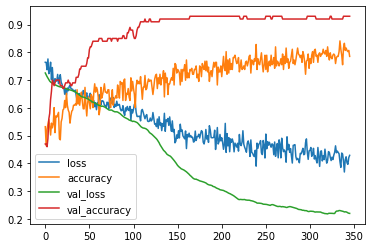

In [52]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [53]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [54]:
model.metrics_names

['loss', 'accuracy']

In [55]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [56]:
training_score

[0.24188752472400665, 0.9270386099815369]

In [57]:
test_score

[0.21987611055374146, 0.9300000071525574]

In [58]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)

In [59]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [60]:
pred_df.head()

,Test_Y,Model_Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [61]:
metrics.accuracy_score(pred_df['Test_Y'],pred_df['Model_Predictions'])

0.93

In [62]:
metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])

array([[43,  6],
       [ 1, 50]], dtype=int64)

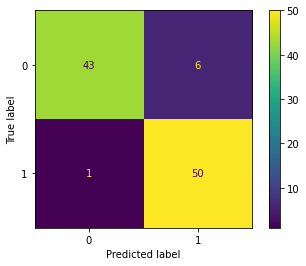

In [63]:
cm = metrics.confusion_matrix(pred_df['Test_Y'],pred_df['Model_Predictions'])
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [64]:
print(metrics.classification_report(pred_df['Test_Y'],pred_df['Model_Predictions']))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.89      0.98      0.93        51

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



## Saving and Loading a Model

In [65]:
# from tensorflow.keras.models import load_model

In [66]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [67]:
# later_model = load_model('my_model.h5')